In [2]:
import pandas as pd
from sklearn import feature_selection
from feature_engine.encoding import OneHotEncoder
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import seaborn
from sklearn import pipeline
from sklearn import cluster
import matplotlib.pyplot as plt

In [3]:
# Definição de Opções de Exibição do Pandas:

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

In [4]:
# Carregamento de Dados
df = pd.read_csv("C:/Users/Mariana Moledo/Documents/GitHub/tcc_mba_cd/datasets/bd_alunos_evadidos.csv",sep=';', encoding='utf-8')
df.columns

Index(['Unnamed: 0', 'CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM',
       'ENEMHUMANAS', 'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO', 'NOME_CURSO', 'cep_destino', 'AREACURSO',
       'DISTANCIA_NUM'],
      dtype='object')

In [5]:
# Exclusão de Colunas

colunas_excluir = ['CODALUNO',
                   'STATUSFORMACAO',
                   'CR',
                   'CURSO',
                   'CODTURNOINGRESSO',
                   'CODTURNOATUAL',
                   'DISCIPLINA',
                   'NOTADISC',
                   'RESULTDISC',
                   'PERIODODISC',
                   'ANODESVINCULACAO',
                   'SEMESTREDESVINCULACAO',
                   'BAIRRO',
                   'CEP',
                   'CIDADE',
                   'CHCURSADA',
                   'TRANCAMENTOS',
                   'TEMPOPERMANENCIA',
                   'NOME_CURSO',
                   'cep_destino',
                   'MOBILIDADE',
                   'Unnamed: 0'
                   ]

In [6]:
df = df.drop(colunas_excluir, axis=1)

In [7]:
df.columns

Index(['ACAOAFIRMATIVA', 'ENEMLINGUAGEM', 'ENEMHUMANAS', 'ENEMNATURAIS',
       'ENEMMATEMATICA', 'ENEMREDACAO', 'TURNOATUAL', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'IDADE', 'COR', 'ESTADOCIVIL', 'SEXO', 'AREACURSO',
       'DISTANCIA_NUM'],
      dtype='object')

In [8]:
# Codificação One-Hot de Variáveis Categóricas
cat_features = ['ACAOAFIRMATIVA',
                'TURNOATUAL',
                'ANOINGRESSO',
                'SEMESTREINGRESSO',
                'COR',
                'ESTADOCIVIL',
                'SEXO',
                'AREACURSO']

df[cat_features] = df[cat_features].astype(str)

onehot = OneHotEncoder(variables=cat_features)
X_transform = onehot.fit_transform(df)

In [9]:
X_transform.shape

(9144, 41)

In [10]:
# Normalização Min-Max
# coloca todas as características numéricas no intervalo de 0 a 1
min_max = preprocessing.MinMaxScaler()
min_max.set_output(transform='pandas')


X_transform = min_max.fit_transform(X_transform)

X_transform

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,IDADE,DISTANCIA_NUM,ACAOAFIRMATIVA_AC,ACAOAFIRMATIVA_A1,ACAOAFIRMATIVA_L2,ACAOAFIRMATIVA_L1,ACAOAFIRMATIVA_L4,ACAOAFIRMATIVA_L3,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,TURNOATUAL_MATUTINO,TURNOATUAL_VESPERTINO,TURNOATUAL_nan,ANOINGRESSO_2012,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_BRANCA,COR_NÃO DECLARADO,COR_PARDA,COR_NEGRA,COR_INDÍGENA,COR_AMARELA,ESTADOCIVIL_SOLTEIRO,ESTADOCIVIL_CASADO,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas,AREACURSO_Ciências Humanas,AREACURSO_Ciências Biológicas e da Saúde,AREACURSO_Farmácia,AREACURSO_Ciências Exatas e da Terra,AREACURSO_Letras e Artes,AREACURSO_Engenharias,AREACURSO_Cinema e Audiovisual
0,0.561224,0.670017,0.617014,0.623363,0.822222,0.488372,0.003459,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.775656,0.737888,0.667534,0.657624,0.600000,0.418605,0.025636,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.725802,0.686957,0.690133,0.705332,0.622222,0.046512,0.043438,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.726968,0.627668,0.669546,0.599041,0.666667,0.093023,0.033672,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.780466,0.692716,0.680667,0.678087,0.444444,0.372093,0.002442,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,0.642566,0.630152,0.679602,0.597287,0.577778,0.069767,0.137335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9140,0.622741,0.608696,0.518694,0.527479,0.422222,0.348837,0.004374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9141,0.643732,0.825974,0.602579,0.411600,0.244444,0.837209,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9142,0.589796,0.677357,0.551585,0.528297,0.488889,0.046512,0.135300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Seleção de Características por Variância:

var_feature_importance = feature_selection.VarianceThreshold(0.2)
var_feature_importance.set_output(transform='pandas')
X_transform_filter = var_feature_importance.fit_transform(X_transform)
X_transform_filter

,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_NÃO DECLARADO,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9139,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
9140,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
9141,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
9142,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [12]:
X_transform_filter.var().reset_index().T

,0,1,2,3,4,5,6,7,8,9
index,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_NÃO DECLARADO,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas
0,0.244545,0.217265,0.243046,0.241886,0.248451,0.248451,0.201076,0.248007,0.248007,0.204218


In [13]:
X_transform_filter.shape

(9144, 10)

In [14]:
# criação de uma instância do modelo KMeans para realizar a clusterização.
model_cluster = cluster.KMeans(random_state=42, max_iter=1000,)
model_cluster


KMeans(max_iter=1000, random_state=42)

In [15]:
# Verifique se há NaNs no DataFrame
nan_check = X_transform_filter.isna()

# Filtre as linhas com True
rows_with_nan = X_transform_filter[nan_check.any(axis=1)]

# Exiba as linhas que contêm NaNs
print(rows_with_nan)



Empty DataFrame
Columns: [TURNOATUAL_INTEGRAL, TURNOATUAL_NOTURNO, ANOINGRESSO_2013, ANOINGRESSO_2014, SEMESTREINGRESSO_1, SEMESTREINGRESSO_2, COR_NÃO DECLARADO, SEXO_M, SEXO_F, AREACURSO_Ciências Sociais Aplicadas]
Index: []


c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Mol

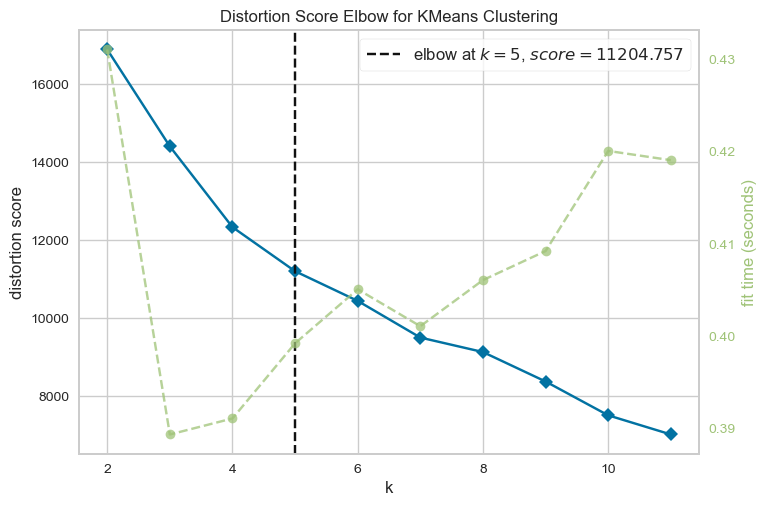

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
visualizer = KElbowVisualizer(model_cluster, k=(2, 12))
visualizer.fit(X_transform_filter)
visualizer.show()

In [17]:
model_cluster = cluster.KMeans(n_clusters=visualizer.elbow_value_)

In [18]:
model_cluster.fit(X_transform_filter)


c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [19]:
cluster_labels = model_cluster.predict(X_transform_filter)
cluster_labels


array([0, 3, 3, ..., 1, 1, 2])

In [20]:
X_transform_filter['cluster_name'] = model_cluster.labels_
X_transform_filter


,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_NÃO DECLARADO,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas,cluster_name
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,3
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,3
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
9139,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
9140,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
9141,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
9142,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


In [21]:
summary_distancia = X_transform_filter.groupby(['cluster_name']).mean()
summary_distancia

,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_NÃO DECLARADO,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas
cluster_name,,,,,,,,,,
0,0.661504,0.242625,0.000000,0.806047,1.0,0.0,0.670354,1.0,0.0,0.257375
1,0.550775,0.355422,0.452668,0.391136,0.0,1.0,0.698795,1.0,0.0,0.261618
2,0.600531,0.282759,0.429178,0.386737,0.0,1.0,0.718833,0.0,1.0,0.292308
3,0.588752,0.290861,0.377856,0.446397,1.0,0.0,0.732425,0.0,1.0,0.306239
4,0.460476,0.435150,0.834229,0.000000,1.0,0.0,0.798158,1.0,0.0,0.314658


<Axes: ylabel='cluster_name'>

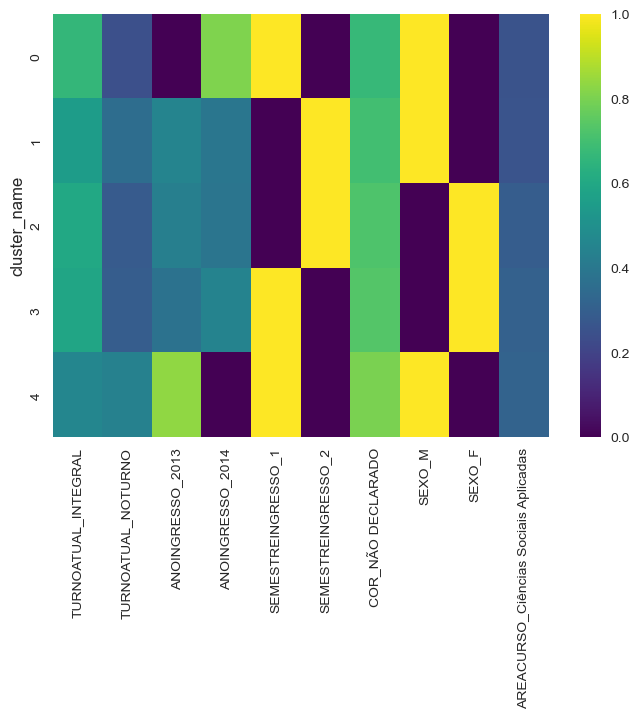

In [22]:
seaborn.heatmap(summary_distancia, cmap='viridis') 

In [23]:
df.dtypes

ACAOAFIRMATIVA       object
ENEMLINGUAGEM       float64
ENEMHUMANAS         float64
ENEMNATURAIS        float64
ENEMMATEMATICA      float64
ENEMREDACAO         float64
TURNOATUAL           object
ANOINGRESSO          object
SEMESTREINGRESSO     object
IDADE                 int64
COR                  object
ESTADOCIVIL          object
SEXO                 object
AREACURSO            object
DISTANCIA_NUM       float64
dtype: object